## **Imbalanced Classification**

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/imbalanced.jpg" width="600">

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/creditcard.csv'

In [3]:
data = pd.read_csv(path)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## About the Data
To quote from Kaggle:

"The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'."

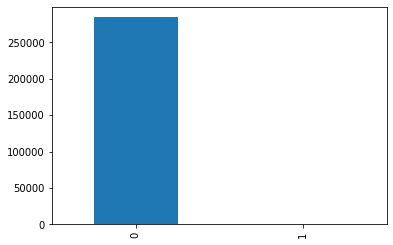

In [4]:
data['Class'].value_counts().plot.bar();

In [5]:
print('Proportion of the classes in the data:')
print(data['Class'].value_counts() / len(data))

Proportion of the classes in the data:
0    0.998273
1    0.001727
Name: Class, dtype: float64


We will build a simple logistic regression classifer and compare the results for the classifier without SMOTE to with SMOTE.

In [6]:
data = data.drop(['Time'], axis = 1)
X = np.array(data.loc[:, data.columns != 'Class'])
#y = np.array(data.loc[:, data.columns == 'Class']).reshape(-1, 1)
y = np.array(data.loc[:, data.columns == 'Class'])

In [7]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 667, 
                                                    shuffle = True, 
                                                    stratify = y
                                                    )

In [9]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver = 'lbfgs')

# Without SMOTE

In [10]:
# What is RAVEL method

array = np.arange(15).reshape(3, 5) 
print("Original array : \n", array) 

Original array : 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [11]:
print("\nravel() : ", array.ravel()) 


ravel() :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [12]:
# This shows array.ravel is equivalent to reshape(-1, order=order). 
print("\nnumpy.ravel() == numpy.reshape(-1)") 
print("Reshaping array : ", array.reshape(-1)) 


numpy.ravel() == numpy.reshape(-1)
Reshaping array :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [13]:
# fit the model
model.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = model.predict(X_train)

# prediction for testing dataset
test_pred = model.predict(X_test)

In [14]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.999247607391505
Accuracy score for Testing Dataset =  0.9991456292499094


Wow! Such high accuracies!

You might think that the model has performed exceptionally well. Well, that's not the case. Let us examine the confusion matrix for our predictions.

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred)
cm

array([[85279,    16],
       [   57,    91]])

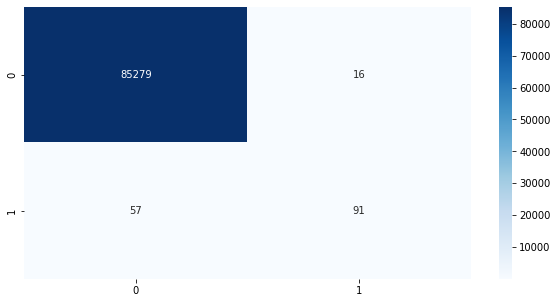

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt=".0f",cmap='Blues');

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Now let's interpret the results. 

57 out of 148 instances which belong to class 1 have been classifed as class 0.

In [ ]:
57/148

0.38513513513513514

That is a whopping 38%! We are classifying 38% of the <b>fraud</b> cases as <b>not fraud</b>. This is going to cost some serious losses to the credit card company. You can observe this similarly in the confusion matrix of the Testing Dataset.

The higher accuracy is not due to correct classification. The model has predicted the majority class for almost all the examples. And since about 99.8% of the examples actually belong to this class, it leads to such high accuracy scores.

In [18]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0    1    All
True                        
0          85279   16  85295
1             57   91    148
All        85336  107  85443


55 out of 162 instances which belong to class 1 have been classifed as class 0. We are missing about 34% of the fraud cases.

# Synthetic Minority Oversampling Technique, or SMOTE


Researchers have found that balancing the data will to better classification models. We will try balancing our data using SMOTE.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/smote.jpg" width="900">

In [19]:
from imblearn.over_sampling import SMOTE
model_smote = LogisticRegression(solver = 'lbfgs')
sm = SMOTE(random_state = 667)

In [20]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

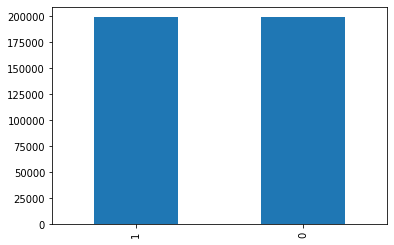

In [21]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar();

In [22]:
# fit the model
model_smote.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = model_smote.predict(X_train_new)

# prediction for Testing data
test_pred_sm = model_smote.predict(X_test)

In [23]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9470404984423676
Accuracy score for Testing Dataset =  0.9743688774972789


Our accuracy has reduced. But our model has definitely improved. Observe the confusion matrices.

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_new, train_pred_sm)
cm

array([[193912,   5108],
       [ 15972, 183048]])

In [25]:
15972/199020

0.08025324088031353

15972 out of 199020 <b>fraud</b> cases have been classified as <b>not fraud</b>. This is a mere 8% compared to the previous 41%.

A vast improvement!

Same is the case with the Testing Dataset.

In [26]:
cm = confusion_matrix(y_test, test_pred_sm)
cm

array([[83118,  2177],
       [   13,   135]])

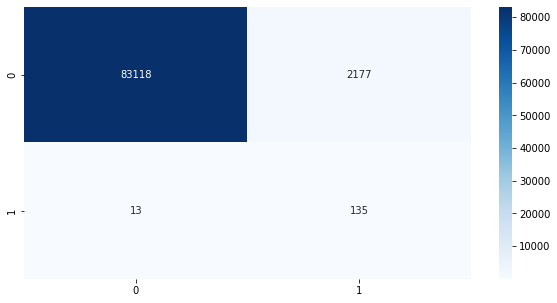

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt=".0f",cmap='Blues');

In [ ]:
13/148

0.08783783783783784

Roughly 8.7% of the fraud classes have been classified as not fraud.

# Conclusion
One might argue that the reduced accuracy is an indicator of lower model performance. However, this is not true.

Error in prediction can be made in two ways:
1. Classifying <b>not fraud</b> as <b>fraud</b>
2. Classifying <b>fraud</b> as <b>not fraud</b>

It should not be hard to understand that the second error is costlier than the first.

The objective of each classification problem is different. So make sure to evaluate each model with respect to its own objective instead of merely judging it on its accuracy.